<a href="https://colab.research.google.com/github/williammcintosh/machine_learning_projects/blob/main/Multilayered_Perceptron_McIntosh_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multilayered Perceptron

## Will McIntosh

## Methodology

### Components

The Input layer

$x_{785,1} =
 \begin{pmatrix}
  -1      \\
  x_{2,1} \\
  x_{3,1} \\
  x_{4,1} \\
  \vdots  \\
  x_{785,1}
 \end{pmatrix}$

The hidden layer

$h_{n+1,1} =
 \begin{pmatrix}
  -1      \\
  h_{2,1} \\
  h_{3,1} \\
  h_{4,1} \\
  \vdots  \\
  h_{n+1,1}
 \end{pmatrix}$

The weights between the input and hidden layers

$W1_{785,n} =
 \begin{pmatrix}
  W1_{1,1} & W1_{1,2} & W1_{1,3} & \cdots & W1_{1,n} \\
  W1_{2,1} & W1_{2,2} & W1_{2,3} & \cdots & W1_{2,n} \\
  W1_{3,1} & W1_{3,2} & W1_{3,3} & \cdots & W1_{3,n} \\
  \vdots  & \vdots & \vdots & \ddots & \vdots  \\
  W1_{785,1} & W1_{785,2} & W1_{785,3} & \cdots & W1_{785,n}
 \end{pmatrix}$

The weights between the hidden and output layers

$W2_{n+1,10} =
 \begin{pmatrix}
  W2_{1,1} & W2_{1,2} & W2_{1,3} & \cdots & W2_{1,10} \\
  W2_{2,1} & W2_{2,2} & W2_{2,3} & \cdots & W2_{2,10} \\
  W2_{3,1} & W2_{3,2} & W2_{3,3} & \cdots & W2_{3,10} \\
  \vdots  & \vdots & \vdots & \ddots & \vdots  \\
  W2_{n+1,1} & W2_{n+1,2} & W2_{n+1,3} & \cdots & W2_{n+1,10}
 \end{pmatrix}$

The output layer

$y_{10,1} =
 \begin{pmatrix}
  y_{1,1}      \\
  y_{2,1} \\
  y_{3,1} \\
  y_{4,1} \\
  \vdots  \\
  y_{10,1}
 \end{pmatrix}$

The target vector where the target is the number 3, or the 4th index

$t_{10,1} =
 \begin{pmatrix}
  0.1      \\
  0.1 \\
  0.1 \\
  0.9 \\
  \vdots  \\
  y_{10,1}
 \end{pmatrix}$

### Forward Process

#### Create Layers

> Create the hidden layer with the bias node vector

> * $h = Sigmoid((x \cdot W1) + B1)$

> Create the output layer with the bias node vector

> * $y = Sigmoid((h \cdot W2) + B2)$

### Backpropagation

#### Calculate error terms

> Formula between hidden and output layers
>
> * $ \delta_{k} = o_{k}(1-o_{k})(t_{k}-o_{k})$
>
> Using linear algebra
>
> * $ eW2 = y \otimes (I-y) \otimes (t-y)$

> Formula between input and hidden layers
>
> * $ \delta_{j} = h_{j}(1-h_{j})(\sum W_{jk}\delta_{jk})$
>
> Using linear algebra
>
> * $ eW1 = h \otimes (I-h) \otimes (W2 \cdot eW2)$

#### Calculate Delta Weights

> Formula between hidden and output layers
>
> * $\Delta W_{kj} = \eta \delta_{k} h_{j} + \alpha \Delta W_{kj}^{t-1}$
>
> Using linear algebra where $PdW2$ is the previous $dW2$
>
> * $dW2 = (\eta(eW2) \cdot h^T + (\alpha(PdW2))^T$

> Formula between input and hidden layers
>
> * $\Delta W_{ji} = \eta \delta_{k} h_{i} + \alpha \Delta W_{ji}^{t-1}$
>
> Using linear algebra where $PdW2$ is the previous $dW2$
>
> * $dW1 = (\eta(eW1) \cdot h^T + (\alpha(PdW1))^T$

### Import libraries

In [141]:
import pandas as pd
import numpy as np
import sys, os
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
np.set_printoptions(threshold=sys.maxsize)
%matplotlib inline

## Download MNIST Dataset from Google Drive

## Get the Datasets

This will download the datasets from a google drive link, but only if the datasets haven't already been downloaded.

In [142]:
if os.path.isfile("/content/mnist_train.csv") == False:
  !gdown --id 1JJGSIoxXtJLqXTZXEBiJJG5dp9zZDGGs

if os.path.isfile("/content/mnist_test.csv") == False:
  !gdown --id 1HpG3GuQFiknf1uEq2BbffPNLNINh7otH

In [143]:
train = pd.read_csv("/content/mnist_train.csv")
test = pd.read_csv("/content/mnist_test.csv")

# Cleaning Up Dataset

In [144]:
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [145]:
train.shape

(60000, 785)

In [146]:
test.shape

(10000, 785)

## Get Label Vectors

In [147]:
# Gets the labeled data
y = trainTrueLabels = train['label']
testTrueLabels = test['label']
train.drop(['label'], axis=1, inplace=True)
test.drop(['label'], axis=1, inplace=True)

## Normalize Values

In [148]:
def NormalizeDF(funcDF):
  x = funcDF.values #returns a numpy array
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  return pd.DataFrame(x_scaled)

# Normalizes dataset
train = NormalizeDF(train)
test = NormalizeDF(test)

# Converting to a numpy matrix
X = train.to_numpy()
test = test.to_numpy()

# Splitting the training data to only be 1/4
train, x_test, trainTrueLabels, y_test = train_test_split(X, y,
                                                    test_size=0.5,
                                                    random_state=0,
                                                    stratify=y)

trainTrueLabels = trainTrueLabels.to_numpy().reshape((trainTrueLabels.shape[0], 1))
print(train.shape)
print(trainTrueLabels.shape)

(30000, 784)
(30000, 1)


In [149]:
print(f"Count for digit 0 = {np.count_nonzero(trainTrueLabels == 0)}")
print(f"Count for digit 1 = {np.count_nonzero(trainTrueLabels == 1)}")
print(f"Count for digit 2 = {np.count_nonzero(trainTrueLabels == 2)}")
print(f"Count for digit 3 = {np.count_nonzero(trainTrueLabels == 3)}")
print(f"Count for digit 4 = {np.count_nonzero(trainTrueLabels == 4)}")
print(f"Count for digit 5 = {np.count_nonzero(trainTrueLabels == 5)}")
print(f"Count for digit 6 = {np.count_nonzero(trainTrueLabels == 6)}")
print(f"Count for digit 7 = {np.count_nonzero(trainTrueLabels == 7)}")
print(f"Count for digit 8 = {np.count_nonzero(trainTrueLabels == 8)}")
print(f"Count for digit 9 = {np.count_nonzero(trainTrueLabels == 9)}")

Count for digit 0 = 2961
Count for digit 1 = 3371
Count for digit 2 = 2979
Count for digit 3 = 3066
Count for digit 4 = 2921
Count for digit 5 = 2711
Count for digit 6 = 2959
Count for digit 7 = 3132
Count for digit 8 = 2925
Count for digit 9 = 2975


## Create Bias Column

In [150]:
bias = np.negative(np.ones((train.shape[0], 1)))
train = np.concatenate((bias, train), axis=1)
bias = np.negative(np.ones((test.shape[0], 1)))
test = np.concatenate((bias, test), axis=1)

# Calculating Loss

## Helper Function

In [151]:
def Sigmoid(x):
  return 1/(1 + np.exp(-x))

## Training

In [152]:
start_time = time.time()

# Parameters
eta = 0.001
a = momentum = 0.9
epochCount = 50
n = hiddenNeurons = 100

# This vector is used for the confusion matrix, counting predicted values
testPredLabels = [1] * (test.shape[0])

# Creating the weights
W1 = np.random.uniform(-0.05,0.05,size=(train.shape[1], n))
W2 = np.random.uniform(-0.05,0.05,size=(n, 10))
B1 = np.negative(np.ones((1, n)))
B2 = np.negative(np.ones((1, 10)))

# Instantiating the delta weights
dW1 = np.zeros(W1.shape)
dW2 = np.zeros(W2.shape)
dB1 = np.zeros(B1.shape)
dB2 = np.zeros(B2.shape)

# Storing accuracies for plots
trainingAccuracies = []
testingAccuracies = []

for i in range(epochCount):

  # For plotting the training accuracy
  trainingCorrect = 0

  # Iterating through the training dataset
  for j, x in enumerate(train):

    # Create the x vector (row from training data)
    x = x.reshape((1,train.shape[1]))

    # Create the hidden layer vector (input * hidden weights) + bias node
    h = Sigmoid(np.dot(x, W1) + B1)

    # Create the prediction vector (hidden * output weights)
    y = Sigmoid(np.dot(h, W2) + B2).T

    # the label for this datapoint
    targetVal = trainTrueLabels[j]

    # Gets the pred value by finding the highest value
    predVal = np.argmax(y)

    if predVal == targetVal:
      trainingCorrect += 1

    # Creates the target vector of value 0.1, and 0.9 for the target value
    t = np.ones((y.shape[0], 1)) * 0.1
    t[targetVal] *= 9

    # Calculate error terms
    I = np.ones((y.shape[0], 1))
    eW2 = y*(I-y)*(t-y)
    eB2 = y*(I-y)*(t-y)
    I = np.ones((h.shape[0], 1))
    eW1 = h.T*(I-h.T)*np.array(W2@eW2)
    eB1 = h.T*(I-h.T)*np.array(B2@eB2)

    # Store previous deltas and bias weights
    PdW2 = dW2
    PdW1 = dW1
    PdB1 = dB1
    PdB2 = dB2

    # Calculate delta weight adjustments
    dW1 = (eta * eW1 @ x + (momentum*PdW1).T).T
    dW2 = (eta * eW2 @ h + (momentum*PdW2).T).T
    dB1 = (eta * eB1 + (momentum*PdB1).T).T
    dB2 = (eta * eB2 + (momentum*PdB2).T).T

    # Update weights
    W1 += dW1
    W2 += dW2
    B1 += dB1
    B2 += dB2


  # For plotting the test accuracy
  testingCorrect = 0

  # Iterating through the test dataset
  for j, x in enumerate(test):
    
    # Create the x vector (row from training data)
    x = x.reshape((1,test.shape[1]))

    # Create the hidden layer vector (input * hidden weights) + bias node
    h = Sigmoid(np.dot(x, W1) + B1)

    # Create the prediction vector (hidden * output weights)
    y = Sigmoid(np.dot(h, W2) + B2).T

    # the label for this datapoint
    targetVal = testTrueLabels[j]

    # Gets the pred value by finding the highest value
    predVal = np.argmax(y)

    if predVal == targetVal:
      testingCorrect += 1
    
    # Stores the predicted value in the test pred vector for confusion matrix
    testPredLabels[j] = predVal

  # Adding accuracies to the list for future plotting
  trainingAccuracies.append(trainingCorrect/train.shape[0])
  testingAccuracies.append(testingCorrect/test.shape[0])


duration = round((time.time() - start_time), 3)
perEpochDuration = round((duration / epochCount), 3)
print(f"--- {duration} seconds total ---")
print(f"--- {perEpochDuration} seconds per epoch ---")
if epochCount > 1:
  trainAcc = round(trainingAccuracies[-1], 4)
  testnAcc = round(testingAccuracies[-1], 4)
  print(f"Final Training Accuracy = {trainAcc}")
  print(f"Final Test Accuracy = {testnAcc}")

--- 2129.004 seconds total ---
--- 42.58 seconds per epoch ---
Final Training Accuracy = 0.975
Final Test Accuracy = 0.9664


# Plotting Accuracy

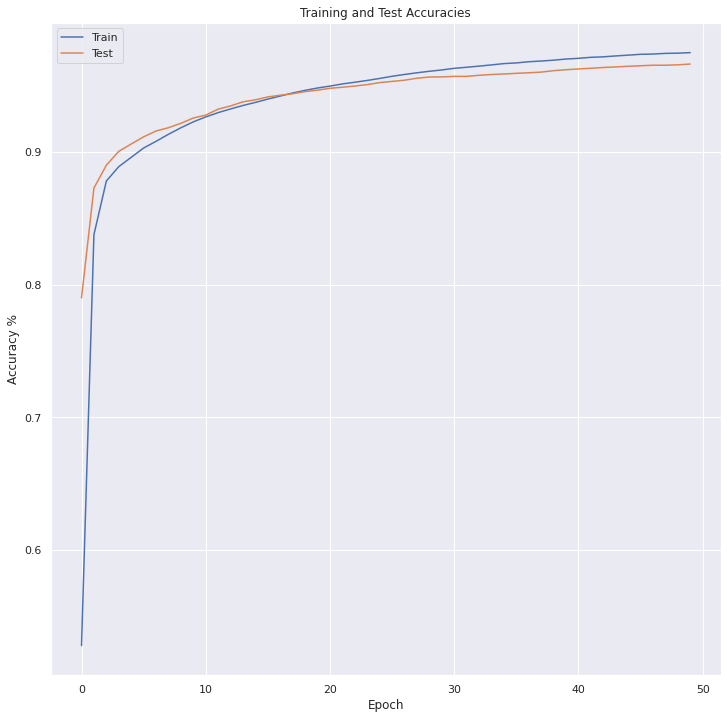

In [153]:
sns.set(rc = {'figure.figsize':(12,12)})  #Edits size of chart
plt.plot(trainingAccuracies, label = "Train")
plt.plot(testingAccuracies, label = "Test")
plt.title("Training and Test Accuracies")
plt.xlabel('Epoch')
plt.ylabel('Accuracy %')
plt.legend()
plt.show()

# Heatmap

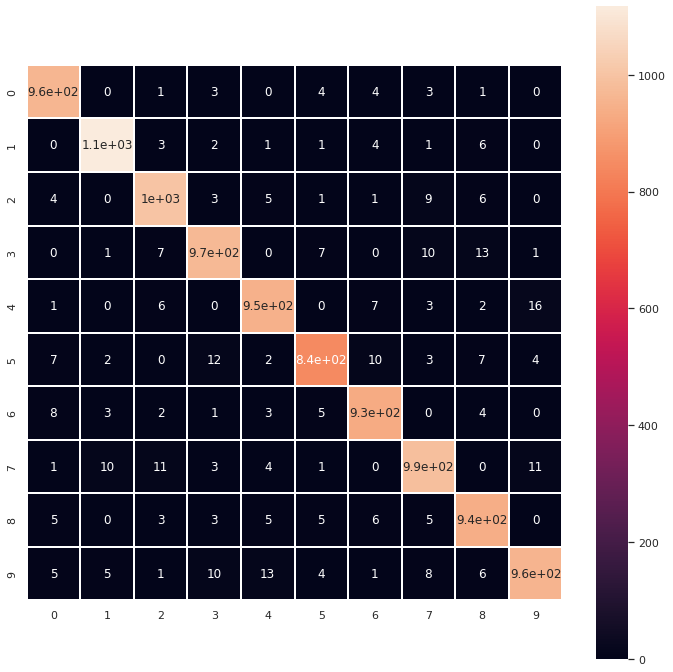

In [154]:
sns.set(rc = {'figure.figsize':(12,12)})  #Edits size of chart
cm = confusion_matrix(testTrueLabels, testPredLabels)
sns.heatmap(cm, annot=True, linewidths=1, square=True)